Text(0.5, 1.0, 'Moisture Content Distribution Over Time')

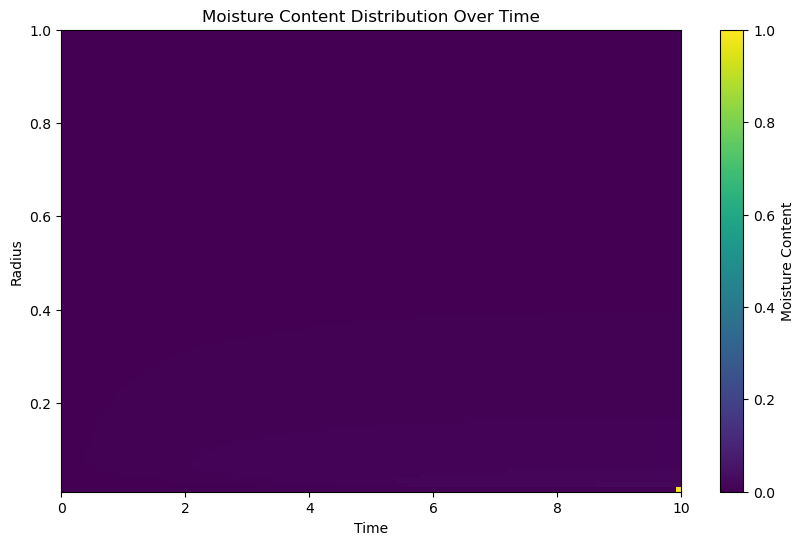

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
L = 1.0     # radius of the cylinder
Ci = 0      # initial moisture content inside
C0 = 1      # boundary moisture content at the surface
D = 1    # diffusion coefficient
N = 100     # number of spatial points
dr = L / N  # spatial step size

# Spatial points
r = np.linspace(dr, L, N)

def moisture_diff(C, t):
    dCdr = np.zeros(N)
    
    # Implement the second derivative using central differences
    # Interior points
    for i in range(1, N-1):
        dCdr[i] = (C[i-1] - 2*C[i] + C[i+1]) / dr**2 + (C[i+1] - C[i-1]) / (2*dr*r[i])
    
    # Boundary conditions
    dCdr[0] = 0  # derivative at r=0 is zero (symmetry)
    dCdr[-1] = (C[-2] - C[-1]) / dr**2 + (C[-2] - C[-1]) / (2*dr*r[-1])  # fixed moisture at the surface
    
    # Return the change in concentration
    return D * dCdr * r

# Initial condition
C_initial = Ci * np.ones(N)
C_initial[-1] = C0  # Apply boundary condition at the surface

# Time points to solve the ODE
t = np.linspace(0, 10, 100)  # from t=0 to t=10

# Solve ODE
C = odeint(moisture_diff, C_initial, t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(C, extent=(0,10,dr,L), aspect='auto', origin='lower')
plt.colorbar(label='Moisture Content')
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Moisture Content Distribution Over Time')